# Assessment Problems

## Problem 1: Extending the Lady Tasting Tea

### Description of the problem

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In the notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

### Libraries

In [ ]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

### Description of the original experiment. 

In the original experiment the lady claims she can know by tasting the tea cups if the milk or the tea was poured first. The experiment is based with 8 cups: 4 tea-first, 4 milk-first). 

Needs to be finished the description of the original experiment from the Lecture notes. 

### Extending the experiment. 

In the extended version of the Lady Tasting Tea experiment, 12 cups are prepared: 8 with tea poured first and 4 with milk poured first. The participant asserts that they can correctly identify which cups were prepared by pouring tea first versus milk first

In [ ]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with tea in first.
no_cups_tea_first = 8

# Number of cups of tea with milk in first.
no_cups_milk_first = 4


#### Looking at different ways to choose the cup of tea    

##### Using the math.comb(n, k) 

In this experiment the use of math.comb method returns the number of combinations of k unordered outcomes from n possibilities, without repetition. 

Checked https://www.w3schools.com/python/ref_math_comb.asp for clarification of how this method is applied.

The `math.comb()` function is called the *choose* function.

It is written and calculated as

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$.

n = 12 (Number of cups of tea in total)

k = 4 (Number of cups of tea with milk first)

In [ ]:
# Number of ways of selecting four cups from twelve.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

495

Here we can see there are 495 possible unique guesses (randomly) to choose the cups that have milk first. But this ones have not order.

So the next step is adding a label to the cups of tea like: `1`, `2`, `3`, `4`, `5`, `6`, `7`, `8`, `9`, `10`, `11`, and `12`.

Then we can select four cups to have milk in first.

For example, I might select `1`, `3`, `7`, and `9`.

How many ways are there to select four cups from eight?

Cups: `1 2 3 4 5 6 7 8 9 10 11 12`

Placeholders: `_ _ _ _`

In [ ]:
# Total number of ways of selecting four cups from 12, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9

# Show.
ways_ordered

11880

In [ ]:
# Number of ways of shuffling four cups.
no_shuffles = 4 * 3 * 2 * 1

# Show.
no_shuffles

24

In [ ]:
# Number of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

495

So, right now we can see that there are 11,880 different ordered selections the lady could make when choosing 4 cups out of 12. These are permutations, where the order of selection matters:

Ordered selections (permutations):

$P(12, 4) = 12 \times 11 \times 10 \times 9 = 11,880$


However, in the context of the Lady Tasting Tea experiment, we are only interested in which 4 cups the lady selects as being poured with milk first, regardless of the order in which she picks them. So we divide by the number of ways to arrange 4 items.

Unordered selections (combinations):
$$
C(12, 4) = \frac{11,880}{4!} = \frac{11,880}{24} = 495
$$

This final number, 495, represents the number of unique combinations (unordered selections) of 4 cups out of 12. It is this number we use when analyzing the statistical significance of her performance, since the order doesn't matter, only the subset she chooses.

(Used ChatGPT to create the formula-equation in the markdown)

##### Using numpy in the experiment.


In [ ]:
# Looking at all the combinations for the 12 cups of tea using numpy.

cups = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
combinations = list(itertools.combinations(cups, no_cups_milk_first))
combinations_array = np.array(combinations)
combinations_array

array([[ 0,  1,  2,  3],
       [ 0,  1,  2,  4],
       [ 0,  1,  2,  5],
       ...,
       [ 7,  8, 10, 11],
       [ 7,  9, 10, 11],
       [ 8,  9, 10, 11]])

In [ ]:
# Looking at the number of combinations.
number_of_combinations = combinations_array.shape[0]
number_of_combinations

495

In [ ]:
# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample and following the notebook from the lecture
# The cup labels.
labels = list(range(no_cups))

# Show.
labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[2, 5, 6, 8]

In [ ]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{2, 5, 6, 8}

In [ ]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

# Loop through the combinations.
for comb in combinations_array:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, len(overlap), overlap)
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

# Show the overlaps.
print(no_overlaps)

[0 1 2 3] 1 {2}
[0 1 2 4] 1 {2}
[0 1 2 5] 2 {2, 5}
[0 1 2 6] 2 {2, 6}
[0 1 2 7] 1 {2}
[0 1 2 8] 2 {8, 2}
[0 1 2 9] 1 {2}
[ 0  1  2 10] 1 {2}
[ 0  1  2 11] 1 {2}
[0 1 3 4] 0 set()
[0 1 3 5] 1 {5}
[0 1 3 6] 1 {6}
[0 1 3 7] 0 set()
[0 1 3 8] 1 {8}
[0 1 3 9] 0 set()
[ 0  1  3 10] 0 set()
[ 0  1  3 11] 0 set()
[0 1 4 5] 1 {5}
[0 1 4 6] 1 {6}
[0 1 4 7] 0 set()
[0 1 4 8] 1 {8}
[0 1 4 9] 0 set()
[ 0  1  4 10] 0 set()
[ 0  1  4 11] 0 set()
[0 1 5 6] 2 {5, 6}
[0 1 5 7] 1 {5}
[0 1 5 8] 2 {8, 5}
[0 1 5 9] 1 {5}
[ 0  1  5 10] 1 {5}
[ 0  1  5 11] 1 {5}
[0 1 6 7] 1 {6}
[0 1 6 8] 2 {8, 6}
[0 1 6 9] 1 {6}
[ 0  1  6 10] 1 {6}
[ 0  1  6 11] 1 {6}
[0 1 7 8] 1 {8}
[0 1 7 9] 0 set()
[ 0  1  7 10] 0 set()
[ 0  1  7 11] 0 set()
[0 1 8 9] 1 {8}
[ 0  1  8 10] 1 {8}
[ 0  1  8 11] 1 {8}
[ 0  1  9 10] 0 set()
[ 0  1  9 11] 0 set()
[ 0  1 10 11] 0 set()
[0 2 3 4] 1 {2}
[0 2 3 5] 2 {2, 5}
[0 2 3 6] 2 {2, 6}
[0 2 3 7] 1 {2}
[0 2 3 8] 2 {8, 2}
[0 2 3 9] 1 {2}
[ 0  2  3 10] 1 {2}
[ 0  2  3 11] 1 {2}
[0 2 4 5] 2 {2, 5}


In [ ]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))

In [ ]:
sum_counts = np.sum(counts[1])
sum_counts

495

<BarContainer object of 5 artists>

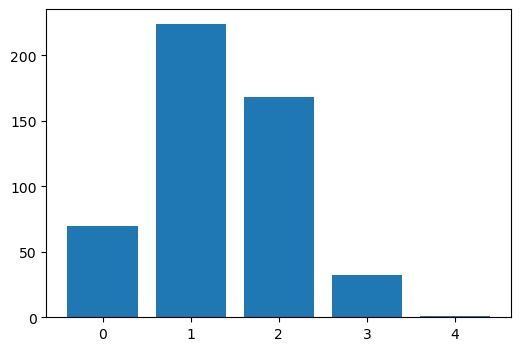

In [ ]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1])

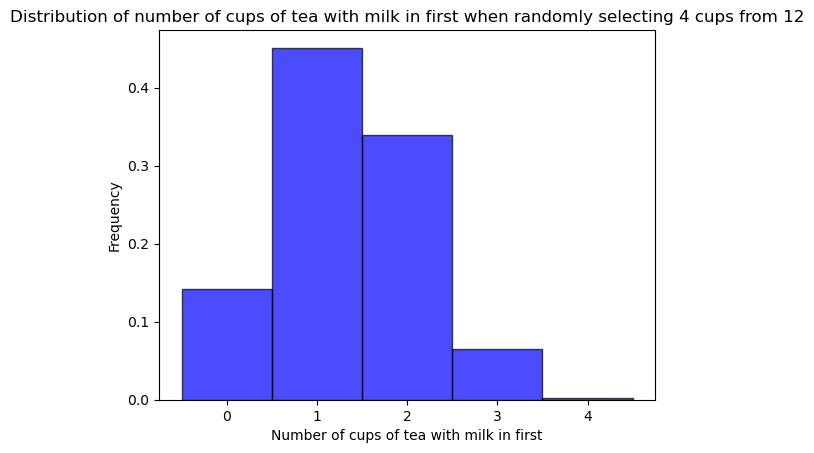

In [ ]:
# In a histogram, show the distribution of number of cups of tea with milk in first
# when randomly selecting 4 cups from 12. 
milk_first_counts = []
n_trials = 100000
for _ in range(n_trials):
    selected_cups = random.sample(range(no_cups), no_cups_milk_first)
    milk_first_count = sum(1 for cup in selected_cups if cup < no_cups_milk_first)
    milk_first_counts.append(milk_first_count)
plt.hist(milk_first_counts, bins=np.arange(-0.5, no_cups_milk_first + 1.5, 1), density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xticks(range(no_cups_milk_first + 1))
plt.xlabel('Number of cups of tea with milk in first')
plt.ylabel('Frequency')
plt.title('Distribution of number of cups of tea with milk in first when randomly selecting 4 cups from 12')
plt.show()

#### The Null Hypothesis
The lady has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first.

The lady is selecting the four cups from the twelve cups at random.

#### Alternative Hypothesis

The lady can tell the difference.

#### Evidence
Fisher: if the lady is just picking four cups at random, then it is unlikely she will pick the correct four. The probability is one in four hundred ninety five. It is so unlikely, that I will agree that something non-random is happening when she is selecting the cups of tea.

In [ ]:
# The probability that she (randomly) selects the four correct cups.
1 / 495

0.00202020202020202

In [ ]:
# The probability that she (randomly) selects at least three correct cups.
(32 + 1) / 495

0.06666666666666667

In [ ]:
# Looking at the estimated probability of success of choosing 4 cups of tea with milk in first out of 12 randomly.
# Number of cups
no_cups = 12
no_cups_milk_first = 4
trials = 10000

# Label cups: 0–3 = milk-first, 4–11 = tea-first
cups = np.arange(no_cups)

# Counter for successes
successes = 0

for _ in range(trials):
    selection = np.random.choice(cups, size=no_cups_milk_first, replace=False)
    if np.all(np.isin([0, 1, 2, 3], selection)):
        successes += 1

# Estimated probability
probability = successes / trials
print("Estimated probability of success:", probability)

Estimated probability of success: 0.0021


A "success" will happen if the lady selection includes all four milk-first cups (M1–M4). The probability of this happening is a 0.2% chance of randomly selecting exactly the four milk-first cups out of twelve. 

I added a Monte Carlo simulation with 10,000 trials to estimate the probability of selecting all four milk-first cups out of twelve. The repeated random sampling produced an approximate probability of 0.002 (0.2%), closely matching the analytical result. 

I've been looking at [geeksforgeeks](https://www.geeksforgeeks.org/python/monte-carlo-integration-in-python/) and [KDnuggets](https://www.kdnuggets.com/numpy-simulating-random-processes-monte-carlo-methods) for the Monte Carlo information and how to applied with NumPy.

0.0021


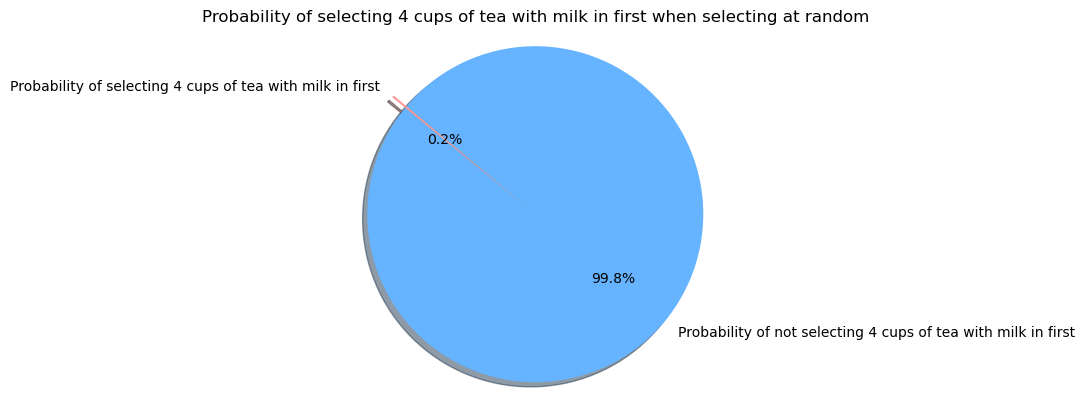

495
11880


In [ ]:
# looking in pie chart for the percent chances of selecting 4 cups of tea with milk in first when selecting at random
# chances of selecting 4 cups of tea with milk in first when selecting at random
probability = successes / trials
print(probability)
probability_percentage = probability * 100
probability_percentage
labels = ['Probability of selecting 4 cups of tea with milk in first', 'Probability of not selecting 4 cups of tea with milk in first']
sizes = [probability_percentage, 100 - probability_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Probability of selecting 4 cups of tea with milk in first when selecting at random')
plt.show()

print(no_combs)
print(ways_ordered)

### Type I Errors, Type II Errors, and Power

## Problem 2: Normal Distribution

Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

### Libraries

In [ ]:
# Binomial distribution.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as stats

# Statistical models.
import statsmodels as sm


### Generate 100,000 samples of size 10

First I'll generate 100,000 samples of size 10 from the standard normal distribution. 

In [ ]:
def generate_samples(n_samples, sample_size):
    # generate samples from the standard normal distribution
    return np.random.normal(loc=0.0, scale=1.0, size=(n_samples, sample_size))

n_samples = 100000
sample_size = 10
samples = generate_samples(n_samples, sample_size)

print(samples)

[[-2.32096968 -0.41116346 -0.74186616 ... -1.27080861  0.75726391
  -0.94742719]
 [ 0.80099417  0.78169028  1.64614614 ...  0.89007265 -1.12616313
  -0.40122583]
 [-0.0692947   0.37098967 -0.64764455 ... -1.85317989  1.20462946
  -0.35476363]
 ...
 [-1.21102083  1.12459409  0.84555537 ... -0.34273033  0.47387755
   0.45852638]
 [ 0.70946284  1.13869172 -0.26671695 ... -0.6025582   0.25008289
  -1.6789106 ]
 [ 1.39609941  0.62957117  1.26956009 ...  0.78241969 -0.61374098
   0.87382468]]


### Compute standard deviations

The second step will be compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD).

In [ ]:
# Compute sample SD (ddof=1) and population SD (ddof=0)
sample_std = np.std(samples, axis=1, ddof=1)
population_std = np.std(samples, axis=1, ddof=0)
print(sample_std)
print(population_std)

[0.87650756 0.85706951 1.08434494 ... 0.76892537 0.84234058 0.57785234]
[0.83152808 0.81308753 1.02869994 ... 0.72946666 0.79911444 0.54819887]


### Plot histograms.

Plot histograms of both sets of values on the same axes with transparency.

Looking at [geeksforgeeks](https://www.geeksforgeeks.org/python/overlapping-histograms-with-matplotlib-in-python/) for information about the plots with transparency bars.

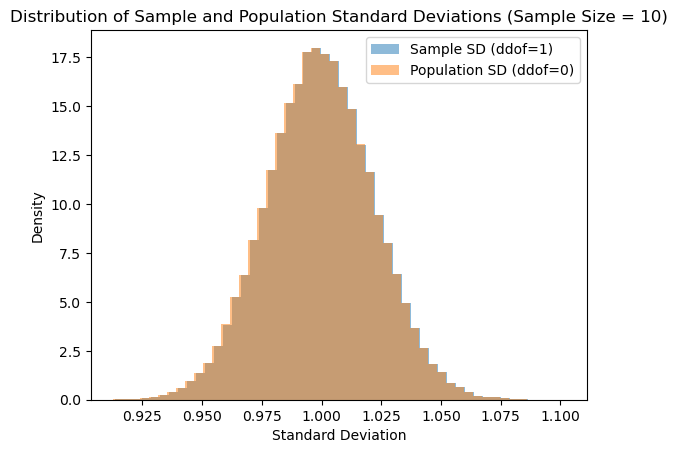

In [ ]:
# Plot histograms of the two standard deviations 

fig, ax = plt.subplots()
ax.hist(sample_std, bins=50, alpha=0.5, label='Sample SD (ddof=1)', density=True)
ax.hist(population_std, bins=50, alpha=0.5, label='Population SD (ddof=0)', density=True)
ax.set_title('Distribution of Sample and Population Standard Deviations (Sample Size = 10)')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Density')
ax.legend()
plt.show()

### Analysis of differences

After running the code and plotting the histograms, you can observe the following:

The histogram for the sample standard deviation (ddof=1) is shifted to the right compared to the population standard deviation (ddof=0). This shows that, on average, the sample standard deviation is a bit larger than the population standard deviation for the same data.

This happens because the sample standard deviation gives a more accurate estimate of the true population spread. In contrast, the population standard deviation, when calculated from a sample, tends to underestimate the real variation. Using n-1 (ddof=1) instead of n (ddof=0) fixes this issue by adjusting for the fact that a sample doesn’t capture all the variation in the population.

### Impact of Increased Sample Size

If you increase the `sample_size` from 10 to a larger number (e.g., 100 or 1000), you should expect to see the following changes:

1.  **Both histograms will become narrower** and more tightly centered around the true standard deviation of the standard normal distribution, which is 1.
2.  **The difference between the two histograms will decrease.** As the sample size `n` increases, the difference between dividing by `n` and `n-1` becomes less significant. As a result, the two estimators will converge, and their distributions will become nearly identical as we can see in the below plots. 

[0.96874343 1.06171872 1.0361762  ... 0.93924065 1.0643986  0.93565387]
[0.96388755 1.05639679 1.0309823  ... 0.93453264 1.05906324 0.93096384]


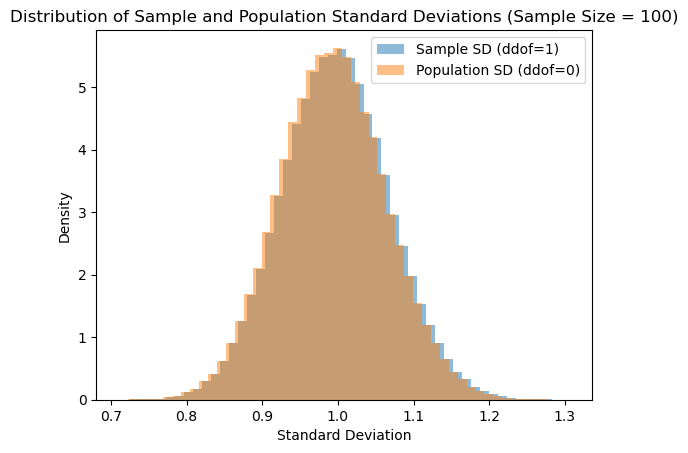

In [ ]:
# plotting the impact of increasing sample size on the distributions of sample and population standard deviations by 100. 
n_samples = 100000
sample_size = 100
samples = generate_samples(n_samples, sample_size)
# Compute sample SD (ddof=1) and population SD (ddof=0)
sample_std = np.std(samples, axis=1, ddof=1)
population_std = np.std(samples, axis=1, ddof=0)
print(sample_std)
print(population_std)

#plot histograms of the two standard deviations
fig, ax = plt.subplots()
ax.hist(sample_std, bins=50, alpha=0.5, label='Sample SD (ddof=1)', density=True)
ax.hist(population_std, bins=50, alpha=0.5, label='Population SD (ddof=0)', density=True)
ax.set_title('Distribution of Sample and Population Standard Deviations (Sample Size = 100)')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Density')
ax.legend()
plt.show()

[0.97824015 0.97519374 1.02404475 ... 1.01454446 0.98783867 0.99508381]
[0.97775091 0.97470603 1.0235326  ... 1.01403706 0.98734463 0.99458614]


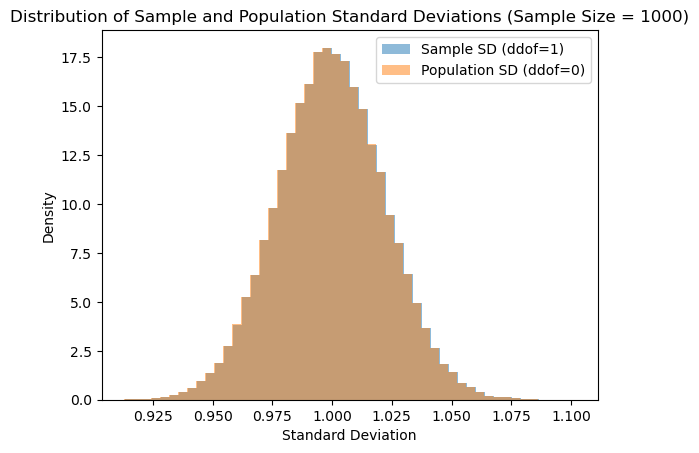

In [ ]:
# plotting the impact of increasing sample size on the distributions of sample and population standard deviations by 100. 
n_samples = 100000
sample_size = 1000
samples = generate_samples(n_samples, sample_size)
# Compute sample SD (ddof=1) and population SD (ddof=0)
sample_std = np.std(samples, axis=1, ddof=1)
population_std = np.std(samples, axis=1, ddof=0)
print(sample_std)
print(population_std)

#plot histograms of the two standard deviations
fig, ax = plt.subplots()
ax.hist(sample_std, bins=50, alpha=0.5, label='Sample SD (ddof=1)', density=True)
ax.hist(population_std, bins=50, alpha=0.5, label='Population SD (ddof=0)', density=True)
ax.set_title('Distribution of Sample and Population Standard Deviations (Sample Size = 1000)')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Density')
ax.legend()
plt.show()

Here in the last plot we can see that the two distributions are nearly identical, indicating that as the sample size increases, the difference between using n and n-1 for standard deviation calculations becomes negligible.    

### Probability Density function

https://en.wikipedia.org/wiki/Normal_distribution

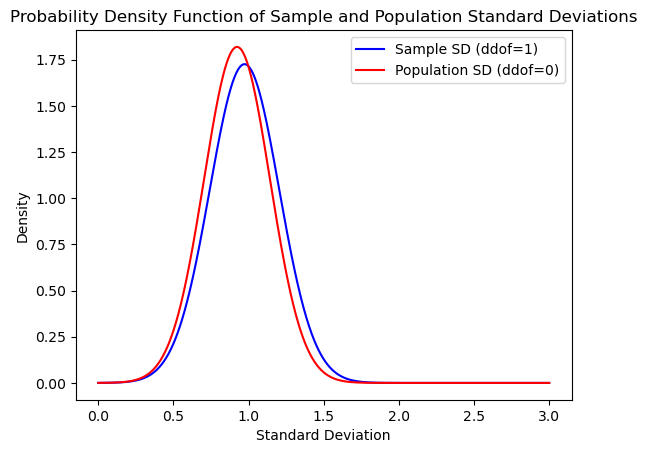

In [ ]:
# looking at the probability density function of the standard normal distribution using the sample function and the population function
n_samples = 100000
sample_size = 10
samples = generate_samples(n_samples, sample_size)
# Compute sample SD (ddof=1) and population SD (ddof=0) 

sample_std = np.std(samples, axis=1, ddof=1)
population_std = np.std(samples, axis=1, ddof=0)

# Plotting the PDF using scipy.stats of the standard normal distribution using the sample function and the population function
x = np.linspace(0, 3, 1000)
pdf_sample = stats.norm.pdf(x, loc=np.mean(sample_std), scale=np.std(sample_std))
pdf_population = stats.norm.pdf(x, loc=np.mean(population_std), scale=np.std(population_std))
fig, ax = plt.subplots()
ax.plot(x, pdf_sample, label='Sample SD (ddof=1)', color='blue')
ax.plot(x, pdf_population, label='Population SD (ddof=0)', color='red')
ax.set_title('Probability Density Function of Sample and Population Standard Deviations')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Density')
ax.legend()
plt.show()


## Problem 3: t-Tests

A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference d =0, 0.1, 0.2,…, 1.0, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean 
d and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.

Plot this proportion against d, and explain how the type II error rate changes as the difference in means increases.

### Libraries

In [ ]:
# Numerical arrays.
import numpy as np

# Statistical functions.
import scipy.stats as stats

# Plotting.
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns

## Problem 4: ANOVA

### Libraries

## End

*************